In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the data from the csv files
df=pd.read_csv('train.csv')
display(df)
df=df.iloc[0:3000,:]
display(df)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,Male,74,1,46.0,0,> 2 Years,Yes,2630.0,11.0,231,1
2996,2997,Male,45,1,28.0,0,> 2 Years,Yes,43780.0,26.0,207,1
2997,2998,Female,46,1,28.0,0,> 2 Years,Yes,40790.0,26.0,43,0
2998,2999,Male,36,1,28.0,0,1-2 Year,Yes,40803.0,124.0,254,0


In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df.iloc[:,0:11], df.iloc[:,11], test_size=0.30, random_state=0)
display(X_train)
display(X_test)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
1732,1733,Male,69,1,28.0,0,> 2 Years,Yes,36588.0,124.0,51
2440,2441,Male,67,1,33.0,0,1-2 Year,Yes,29344.0,26.0,246
1232,1233,Female,20,1,47.0,0,< 1 Year,Yes,46175.0,160.0,171
1081,1082,Male,74,1,30.0,0,> 2 Years,Yes,34753.0,124.0,206
2920,2921,Male,25,1,30.0,1,< 1 Year,No,44025.0,152.0,275
...,...,...,...,...,...,...,...,...,...,...,...
763,764,Female,35,1,28.0,0,1-2 Year,Yes,22773.0,124.0,193
835,836,Female,25,1,18.0,1,< 1 Year,No,25162.0,152.0,155
1653,1654,Male,64,1,39.0,1,1-2 Year,No,45167.0,152.0,214
2607,2608,Male,33,1,28.0,0,1-2 Year,Yes,44627.0,124.0,225


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
311,312,Female,59,1,39.0,0,1-2 Year,Yes,44630.0,124.0,200
1025,1026,Female,25,1,33.0,1,< 1 Year,No,33951.0,152.0,206
1587,1588,Female,66,1,19.0,0,1-2 Year,Yes,39097.0,26.0,202
2941,2942,Male,52,1,8.0,0,1-2 Year,Yes,2630.0,26.0,110
2980,2981,Female,22,1,3.0,1,< 1 Year,No,25077.0,152.0,295
...,...,...,...,...,...,...,...,...,...,...,...
1341,1342,Female,25,1,30.0,1,< 1 Year,No,32914.0,152.0,158
1612,1613,Male,55,1,15.0,0,1-2 Year,Yes,29994.0,154.0,215
757,758,Male,46,1,36.0,1,1-2 Year,No,37565.0,26.0,18
39,40,Male,72,1,41.0,1,1-2 Year,No,32210.0,152.0,233


In [107]:
def transform_categorical(df):
  df['Gender']=pd.get_dummies(df.Gender, drop_first=True)
  dummy_age=pd.get_dummies(df.Vehicle_Age, drop_first=True)
  df=pd.concat([df,dummy_age],axis=1, join='inner')
  df=df.drop(['Vehicle_Age','id'], axis =1)
  df['Vehicle_Damage']=pd.get_dummies(df.Vehicle_Damage, drop_first=True)
  return df

X_train=transform_categorical(X_train)
X_test=transform_categorical(X_test)

display(X_train)
print(X_train.dtypes)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,< 1 Year,> 2 Years
1732,1,69,1,28.0,0,1,36588.0,124.0,51,0,1
2440,1,67,1,33.0,0,1,29344.0,26.0,246,0,0
1232,0,20,1,47.0,0,1,46175.0,160.0,171,1,0
1081,1,74,1,30.0,0,1,34753.0,124.0,206,0,1
2920,1,25,1,30.0,1,0,44025.0,152.0,275,1,0
...,...,...,...,...,...,...,...,...,...,...,...
763,0,35,1,28.0,0,1,22773.0,124.0,193,0,0
835,0,25,1,18.0,1,0,25162.0,152.0,155,1,0
1653,1,64,1,39.0,1,0,45167.0,152.0,214,0,0
2607,1,33,1,28.0,0,1,44627.0,124.0,225,0,0


Gender                    uint8
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Damage            uint8
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
< 1 Year                  uint8
> 2 Years                 uint8
dtype: object


In [108]:
for col in X_train.columns.values:
  list_val=pd.unique(X_train[col])
  print(col+" is of type "+str(X_train[col].dtypes)+", has "+str(len(list_val))+" unique values and "+str(X_train[col].isna().sum())+" null entries")
  if len(list_val)<10:
    print('  These are: ',end="")
    for n in range(len(list_val)-1):
      print(list_val[n],end=", ")
    print(list_val[-1])

Gender is of type uint8, has 2 unique values and 0 null entries
  These are: 1, 0
Age is of type int64, has 62 unique values and 0 null entries
Driving_License is of type int64, has 2 unique values and 0 null entries
  These are: 1, 0
Region_Code is of type float64, has 52 unique values and 0 null entries
Previously_Insured is of type int64, has 2 unique values and 0 null entries
  These are: 0, 1
Vehicle_Damage is of type uint8, has 2 unique values and 0 null entries
  These are: 1, 0
Annual_Premium is of type float64, has 1722 unique values and 0 null entries
Policy_Sales_Channel is of type float64, has 59 unique values and 0 null entries
Vintage is of type int64, has 290 unique values and 0 null entries
< 1 Year is of type uint8, has 2 unique values and 0 null entries
  These are: 0, 1
> 2 Years is of type uint8, has 2 unique values and 0 null entries
  These are: 1, 0


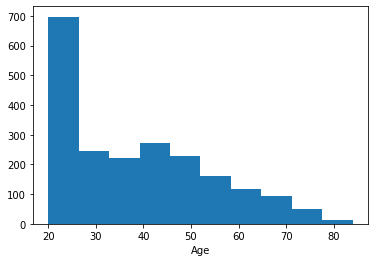

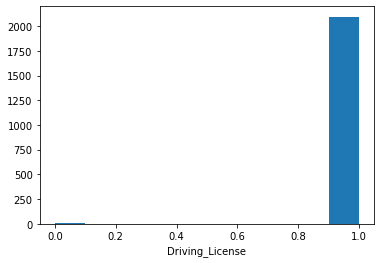

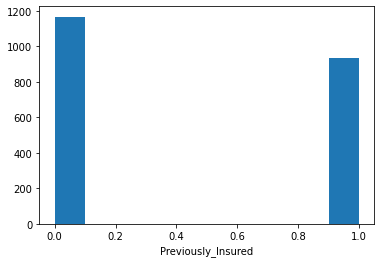

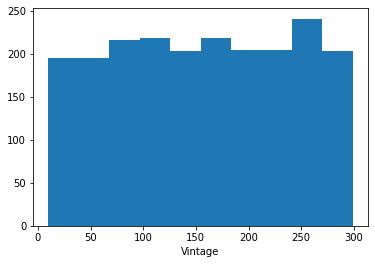

In [109]:
# Visualisation of data
for col in X_train.columns.values:
  if (X_train[col].dtypes=='int64') | (X_train[col].dtypes=='object'):
    plt.hist(X_train[col])
    plt.xlabel(col)
    plt.show()

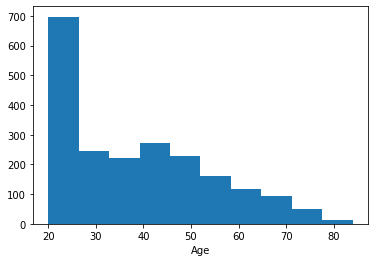

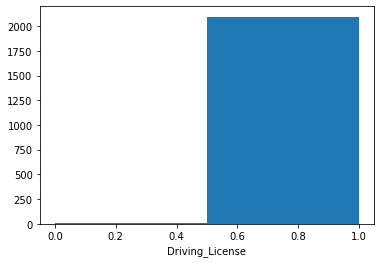

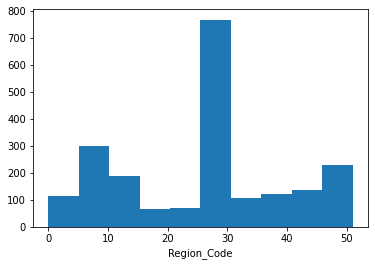

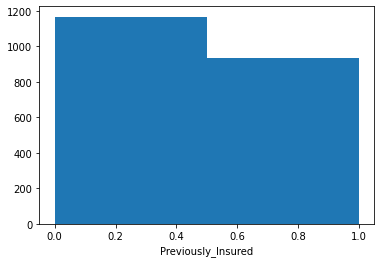

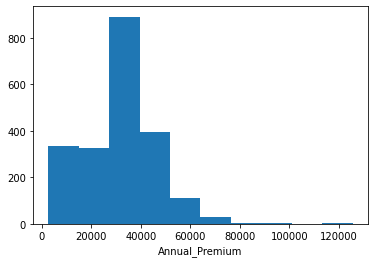

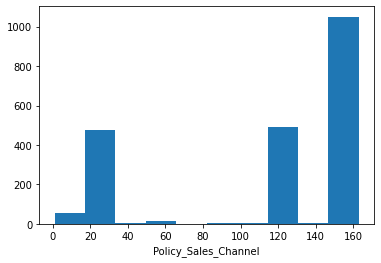

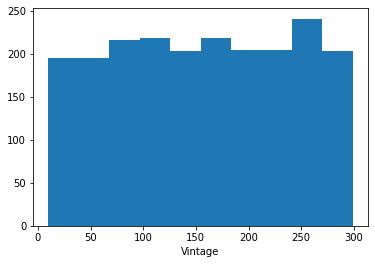

In [110]:
for col in X_train.columns.values:
  if (X_train[col].dtypes=='int64') | (X_train[col].dtypes=='float64'):
    plt.hist(X_train[col],10 if len(pd.unique(X_train[col]))>20 else len(pd.unique(X_train[col])))
    plt.xlabel(col)
    plt.show()

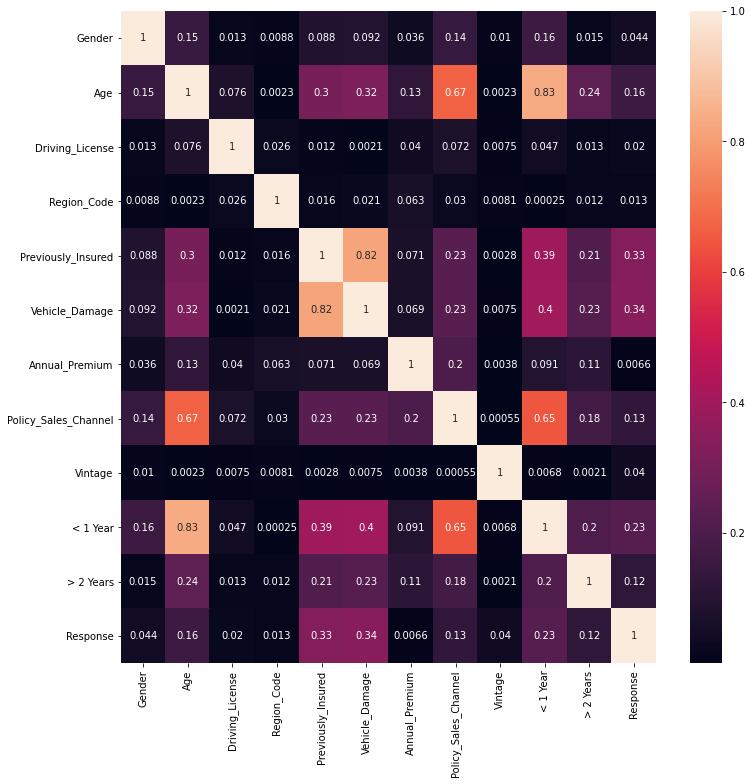

In [111]:
sample=pd.concat([X_train,Y_train],axis=1,join='inner')
CorrMatrix=sample.corr(method='spearman')
fig,ax=plt.subplots(figsize=(12,12))
sns.heatmap(abs(CorrMatrix),annot=True)
plt.show()

In [112]:
X_train=X_train.drop(['Vintage', 'Region_Code'], axis=1)
display(X_train)
X_test=X_test.drop(['Vintage', 'Region_Code'], axis=1)
display(X_test)

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,< 1 Year,> 2 Years
1732,1,69,1,0,1,36588.0,124.0,0,1
2440,1,67,1,0,1,29344.0,26.0,0,0
1232,0,20,1,0,1,46175.0,160.0,1,0
1081,1,74,1,0,1,34753.0,124.0,0,1
2920,1,25,1,1,0,44025.0,152.0,1,0
...,...,...,...,...,...,...,...,...,...
763,0,35,1,0,1,22773.0,124.0,0,0
835,0,25,1,1,0,25162.0,152.0,1,0
1653,1,64,1,1,0,45167.0,152.0,0,0
2607,1,33,1,0,1,44627.0,124.0,0,0


,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,< 1 Year,> 2 Years
311,0,59,1,0,1,44630.0,124.0,0,0
1025,0,25,1,1,0,33951.0,152.0,1,0
1587,0,66,1,0,1,39097.0,26.0,0,0
2941,1,52,1,0,1,2630.0,26.0,0,0
2980,0,22,1,1,0,25077.0,152.0,1,0
...,...,...,...,...,...,...,...,...,...
1341,0,25,1,1,0,32914.0,152.0,1,0
1612,1,55,1,0,1,29994.0,154.0,0,0
757,1,46,1,1,0,37565.0,26.0,0,0
39,1,72,1,1,0,32210.0,152.0,0,0


,0,1,2,3,4,5,6,7,8
0,0.905405,1.984502,0.053529,-0.894140,0.960769,0.348703,0.204617,-0.871088,4.253341
1,0.905405,1.853683,0.053529,-0.894140,0.960769,-0.103634,-1.624669,-0.871088,-0.235109
2,-1.104479,-1.220578,0.053529,-0.894140,0.960769,0.947343,0.876599,1.147990,-0.235109
3,0.905405,2.311551,0.053529,-0.894140,0.960769,0.234120,0.204617,-0.871088,4.253341
4,0.905405,-0.893529,0.053529,1.118393,-1.040833,0.813091,0.727270,1.147990,-0.235109
...,...,...,...,...,...,...,...,...,...
2095,-1.104479,-0.239431,0.053529,-0.894140,0.960769,-0.513947,0.204617,-0.871088,-0.235109
2096,-1.104479,-0.893529,0.053529,1.118393,-1.040833,-0.364770,0.727270,1.147990,-0.235109
2097,0.905405,1.657453,0.053529,1.118393,-1.040833,0.884401,0.727270,-0.871088,-0.235109
2098,0.905405,-0.370251,0.053529,-0.894140,0.960769,0.850682,0.204617,-0.871088,-0.235109


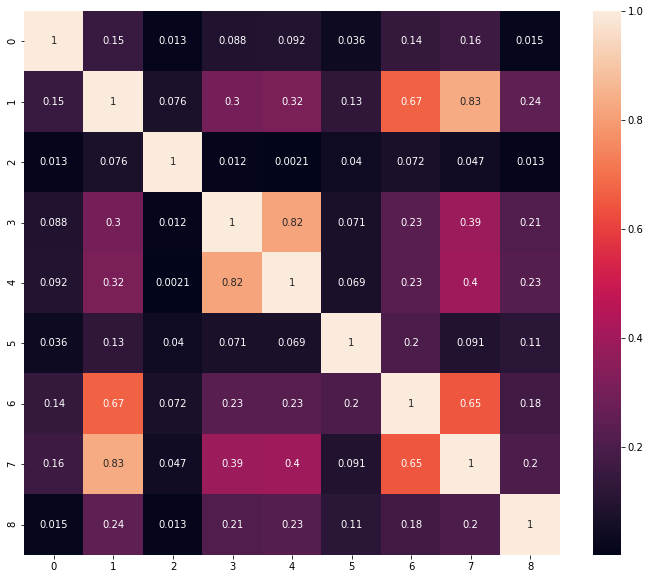

In [113]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

from sklearn import preprocessing
scaler= preprocessing.StandardScaler()
scaler.fit(X_train)
X_train=pd.DataFrame(scaler.transform(X_train))
display(X_train)

corrMatrix = X_train.corr(method='spearman')
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(abs(corrMatrix), annot=True)
plt.show()

In [114]:
X_test=pd.DataFrame(scaler.transform(X_test))
display(X_test)

,0,1,2,3,4,5,6,7,8
0,-1.104479,1.330404,0.053529,-0.894140,0.960769,0.850869,0.204617,-0.871088,-0.235109
1,-1.104479,-0.893529,0.053529,1.118393,-1.040833,0.184041,0.727270,1.147990,-0.235109
2,-1.104479,1.788273,0.053529,-0.894140,0.960769,0.505372,-1.624669,-0.871088,-0.235109
3,0.905405,0.872536,0.053529,-0.894140,0.960769,-1.771735,-1.624669,-0.871088,-0.235109
4,-1.104479,-1.089758,0.053529,1.118393,-1.040833,-0.370078,0.727270,1.147990,-0.235109
...,...,...,...,...,...,...,...,...,...
895,-1.104479,-0.893529,0.053529,1.118393,-1.040833,0.119287,0.727270,1.147990,-0.235109
896,0.905405,1.068765,0.053529,-0.894140,0.960769,-0.063046,0.764602,-0.871088,-0.235109
897,0.905405,0.480077,0.053529,1.118393,-1.040833,0.409710,-1.624669,-0.871088,-0.235109
898,0.905405,2.180732,0.053529,1.118393,-1.040833,0.075328,0.727270,-0.871088,-0.235109


### Support Vector Classifier Using GridSearchCV

In [115]:
# Support Vector Classifier Using GridSearchCV 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

print('Training SVC using GridSearchCV...')
scoring = 'f1'

from sklearn import svm
hyperparameters = {'kernel':('rbf', 'linear', 'poly'), 'C':[0.1,0.5,1,5,10], 'degree':[3,5,8]}

svc = svm.SVC()
clf = GridSearchCV(estimator=svc, param_grid=hyperparameters, scoring=scoring)
clf.fit(np.array(X_train), np.squeeze(Y_train))
print('Best parameters:')
print(clf.best_params_)
print('Best' +scoring+":" +str(clf.best_score_))

print('Test classification report:')
y_true, y_pred = np.squeeze(Y_test), clf.predict(np.array(X_test))
print(classification_report(y_true, y_pred))

print('Test AUC-ROC: '+str(roc_auc_score(y_true, y_pred)))
print('')

Training SVC using GridSearchCV
Best parameters:
{'C': 10, 'degree': 8, 'kernel': 'poly'}
Bestf1:0.15914036212543675
Test classification report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       780
           1       0.31      0.09      0.14       120

    accuracy                           0.85       900
   macro avg       0.59      0.53      0.53       900
weighted avg       0.80      0.85      0.81       900

Test AUC-ROC: 0.5298076923076923


### Random Forest Classifier

In [116]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

print('Training Random Forest Classifier...')
rfc = RandomForestClassifier()
hyperparameters = {'max_depth':[2,5,10,20],'n_estimators':[10,30,100]}
clf = GridSearchCV(rfc, param_grid=hyperparameters, scoring='f1')
clf.fit(np.array(X_train), np.squeeze(Y_train))
print('Best parameters: ')
print(clf.best_params_)
print('Best' +scoring+":" +str(clf.best_score_))

print('Test classification report:')
y_true, y_pred = np.squeeze(Y_test), clf.predict(np.array(X_test))
print(classification_report(y_true, y_pred))

print('Test AUC-ROC: '+str(roc_auc_score(y_true, y_pred)))

Best parameters: 
{'max_depth': 20, 'n_estimators': 10}
Bestf1:0.19221396122424894
Test classification report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       780
           1       0.32      0.17      0.23       120

    accuracy                           0.84       900
   macro avg       0.60      0.56      0.57       900
weighted avg       0.81      0.84      0.82       900

Test AUC-ROC: 0.5586538461538462


### Anomaly Detection

In [118]:
# Anomaly Detection Algorithm
print('Training Anomaly Detection Classifier...')
clf = svm.OneClassSVM(nu=0.1, kernel="linear")
clf.fit(np.array(X_train), np.squeeze(Y_train))

y_true, y_pred = np.squeeze(Y_test), clf.predict(np.array(X_test))
print('Test AUC-ROC: '+str(roc_auc_score(y_true, y_pred)))

Training Anomaly Detection for nu=0.1
Test AUC-ROC: 0.728525641025641
